In [ ]:
#*****************************************************************************************************************************
#Project   : Path Finder                                                                                                     #
#Author    : Kata Revanth                                                                                                    #
#            Sri ram Alluri                                                                                                  #
#            Lavanya Chadwalada                                                                                              #
#Objective : The Main Objective of the project is to demonstrate the Q-Learning Model in finding the optimal path to reach   #
#the Goal State from any particular state in the Environment                                                                 #
#Approach  : 1)Design the path Grid(for Visualization)                                                                       #
#            2)Build Reward Matrix                                                                                           #
#            3)Build Q-Learning Model using Bellmen Equation                                                                 #
#            4)Build Q-Learning Model using Heuristic Fuction                                                                #
#            5)Compare the Perfomance of Both models                                                                         #
#            6)Evaluate the Metrics of the Q-Lerning Models                                                                  #
#*****************************************************************************************************************************

## Importing required libraries

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

## Grid environment where the agent is to be trained 
- There were 10 states and 1 Goal state in the grid for the agent to learn 

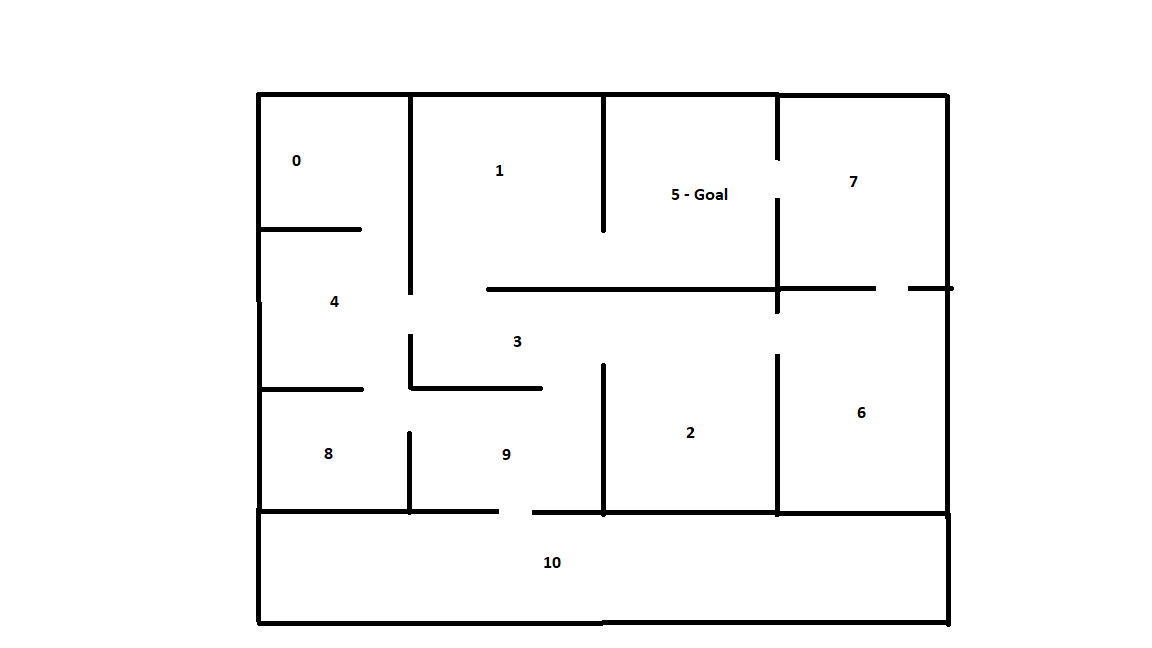

## Creating the reward matrix for each state and action in the grid

In [2]:
rewards = np.array([[-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1],
                   [-1,-1,-1,0,-1,100,-1,-1,-1,-1,-1],
                    [-1,-1,-1,0,-1,-1,0,-1,-1,-1,-1],
                    [-1,0,0,-1,0,-1,-1,-1,-1,0,-1],
                    [0,-1,-1,0,-1,-1,-1,-1,0,-1,-1],
                    [-1,0,-1,-1,-1,-1,-1,0,-1,-1,-1],
                    [-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1],
                    [-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1],
                    [-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1],
                    [-1,-1,-1,0,-1,-1,-1,-1,0,-1,0],
                    [-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1]])

pd.DataFrame(rewards)

,0,1,2,3,4,5,6,7,8,9,10
0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,0,-1,100,-1,-1,-1,-1,-1
2,-1,-1,-1,0,-1,-1,0,-1,-1,-1,-1
3,-1,0,0,-1,0,-1,-1,-1,-1,0,-1
4,0,-1,-1,0,-1,-1,-1,-1,0,-1,-1
5,-1,0,-1,-1,-1,-1,-1,0,-1,-1,-1
6,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1
7,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1
8,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1
9,-1,-1,-1,0,-1,-1,-1,-1,0,-1,0


## Initialising the q-matrix with zeroes

In [3]:
def initialize_q(m,n):
    return np.zeros((m,n))

q_matrix = initialize_q(11,11)
pd.DataFrame(q_matrix)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def normalize_matrix(q_matrix):
    normalized_q = q_matrix/max(q_matrix[q_matrix.nonzero()]) * 100
    return normalized_q.astype(int)

In [5]:
def set_initial_state(rooms = 11):
    return np.random.randint(0,rooms)

## Simple Q-Learning Model Building to reach Goal State(i.e. 5)

In [7]:
def train_agent(episode):
    gamma=0.8
    Time_step = 0
    current_state = set_initial_state()

    while True:
        valid_actions = []
        for action in enumerate(rewards[current_state]):
            if action[1]!= -1:
                valid_actions +=[action[0]]
        action = random.choice(valid_actions)
        cur_state_reward= rewards[current_state, action] 
        nxt_state_reward= max(q_matrix[action,])
        q_current_state= cur_state_reward+(gamma*nxt_state_reward)
        q_matrix[current_state, action]=q_current_state 
        new_state= action
        print(q_matrix)
        print(f"Old State: {current_state} | New State: {new_state}\n\n")
        current_state = new_state
        Time_step = Time_step +1

        if new_state== 5:
            print(f"Agent has reached it's goal!")
            print(f"The Total Timesteps took by Agent for this episode {episode} is",Time_step)
            break
    return Time_step,q_matrix

## Full training for the Agent

In [ ]:
iterations = 500
Total_steps = 0
Learning_step_bi = []
rewards_curve_bi = []
for episode in range(1,iterations):
    steps,q_matrix = train_agent(episode) 
    rewards_curve_bi.append(np.sum(q_matrix))
    Learning_step_bi.append(Total_steps + steps)
    Total_steps = Total_steps + steps
print("Total Steps for full learning Process:",Total_steps)

## Normalised q-matrix after an agent is trained

In [ ]:
print('The final updated Q-Table after Training:\n',pd.DataFrame(normalize_matrix(q_matrix)))

## Challenges of the Simple Q-Learning Model
- Required more Timesteps for reaching goal in each episode
- Required more episodes
- Needed more computation power as the environment size increases
- Required more time for Agent to learn 

## Optimised Q-Learning Model Implementation to reach Goal State

## For a larger grid 
- The number of transistions an agent makes in a single episode is too high which increases the space and time complexity.
- Therefore, to have optimized results, a heuristic function is required which would Approximate the q-learning algorithm.
- Below is the one of a kind heuristic function used for Improving Q-Learning Model
    - Eachtime the valid actions for the current state are stored, those are compared with the already visited action for the by the agent, if valid action is already visited, then it is removed for the valid action and agent will not visit it for the epsiode.
    - This will drastically reduce the total number of transistions that agent makes through its training.


In [ ]:
def initialize_q(m,n):
    return np.zeros((m,n))

q_matrix = initialize_q(11,11)
pd.DataFrame(q_matrix)

In [ ]:
def train_agent(episode):
    gamma=0.8
    Time_step = 0
    current_state = set_initial_state()
    
    visited_actions = []
    while True:
        valid_actions = []
        temp_value = 0
        for action in enumerate(rewards[current_state]):
            if action[1]!= -1:
                temp_value = action[0]
                valid_actions +=[action[0]]
                if action[0] in visited_actions:
                    index = valid_actions.index(action[0])
                    valid_actions.pop(index)
        if len(valid_actions) == 0:
            break
        action = random.choice(valid_actions)
        visited_actions.append(action)
        cur_state_reward= rewards[current_state, action] 
        nxt_state_reward= max(q_matrix[action,])
        q_current_state= cur_state_reward+(gamma*nxt_state_reward)
        q_matrix[current_state, action]=q_current_state 
        new_state= action
        print(q_matrix)
        print(f"Old State: {current_state} | New State: {new_state}\n\n")
        current_state = new_state
        Time_step = Time_step +1

        if new_state== 5:
            print(f"Agent has reached it's goal!")
            print(f"The Total Timesteps took by Agent for this episode {episode} is",Time_step)
            break
    return Time_step,q_matrix

## Full Training for the Agent

In [ ]:
iterations = 500
Total_steps = 0
Learning_step_ai = []
rewards_curve_ai = []
for episode in range(1,iterations):
    steps,q_matrix = train_agent(episode)
    rewards_curve_ai.append(np.sum(q_matrix))
    Learning_step_ai.append(Total_steps + steps)
    Total_steps = Total_steps + steps
    
print("Total Steps for full learning Process:",Total_steps)

## Normalised q-matrix after an agent is trained

In [ ]:
print('The final updated Q-Table after Training:\n',pd.DataFrame(normalize_matrix(q_matrix)))

# Test metrics for the q-learning agent performance when heuristic is applied

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.ylim(0,15000)
plt.plot(range(1,500),Learning_step_bi, label = 'Without Heuristic')
plt.plot(range(1,500),Learning_step_ai, label = 'Using Heuristic')
plt.title('Q-Learning Model Learning Process')
plt.xlabel('Number of Iterations')
plt.ylabel('Total Cummulative Steps')
plt.legend()
plt.show()

# Visualising total rewards for an agent 
## simple Q-learning algorithm Vs Q-learning algorithm with a heuristic function

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.ylim(0,4000)
plt.plot(range(1,500),rewards_curve_bi)
plt.title('Q-Learning Rewards Learning Process - Without Heuristic')
plt.xlabel('Number of Iterations')
plt.ylabel('Total Cummulative Rewards')

plt.subplot(1,2,2)
plt.ylim(0,4000)
plt.plot(range(1,500),rewards_curve_ai)
plt.title('Q-Learning Rewards Learning Process - With Heuristic')
plt.xlabel('Number of Iterations')
plt.ylabel('Total Cummulative Rewards')

plt.show()

## Deploying the agent

In [ ]:
def deploy_agent(init_state,q_table):
    print("start state:", init_state)
    state = init_state
    steps = 0
    while True:
        steps = steps + 1
        action = np.argmax(q_table[state,:])
        print(action)
        state = action
        if action == 5:
            print('Goal Reached!')
            return steps

## Testing the Agent

In [ ]:
Start_state = 8
steps = deploy_agent(Start_state,q_matrix)
print("Number of Steps took by Agent to reach Goal:",steps)

## Evaluation Metrics for Q-Learning Model
- Updated Q-Table 
    - Initally Q table is Initialied with zeroes, once the training is completed, Q-Table is updated with the Maximum rewards for the each state, action pair which helps the agent to choose the best action in that particular state
- Rewards Learning
    - For each episode , reward is calculated and updated Q-Table and the reward learning progress graph is shown above.
- Total Number of Timesteps for the complete Training process
    - Upon using the Heuristic fuction, the search process computing process is improved and Q-Table is updated with the Maximum rewards with the least number of Timesteps for episode.
- Total Regrets
    - Even upon the successful training, there will always be the chance of regrets for the agent not to choose the optimal path towards the goal. In our Q-learning model even after success training, we can see 1 regret for the state 6 in which agent miss to choose the optimal path and rather used more steps to reach the goal. 

## Conclusion
- Q-Learning Model using Heuristic function outperfom the Simple Q-Learning Model intems of performance. 
- We can see the huge reduction of total number of time steps for Q-Learning Model using Heuristic Function.
- Agent learns quickly in Q-Learning Model using Heuristic 